<a href="https://colab.research.google.com/github/drpetros11111/deep-learning-with-python-notebooks/blob/pp_study/01_ml_endTOend_tf_wflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import the Data

In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# 2. Define the network architecture

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model= keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')

])

Define the compilation architecture

In [6]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. Preprocess the Data

In [8]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

# 4. Flatten & Reshape the input images -inside parenthesis flattens, external parenthesis reshapes

The double parentheses in the line

    train_images = train_images.reshape((60000, 28*28))
    
are used because the reshape function in Python expects a single argument: a tuple that defines the new shape of the array.

In this case, reshape((60000, 28*28)) means that the array train_images will be reshaped into an array with 60,000 rows, where each row is flattened into a single vector of 28*28 (784) elements.

##The inner parentheses define the tuple (60000, 784), flattens (28*28 = 784), 60000 images .

Here’s why double parentheses are used:

The first set of parentheses is for calling the reshape function.

The second set of parentheses encloses the tuple (60000, 28*28), which defines the new shape.

If we didn't use the double parentheses, the function would not receive a tuple, and Python would raise an error.

# 5. Fit the model

In [10]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9025 - loss: 0.3328
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9726 - loss: 0.0940
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9825 - loss: 0.0597
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9870 - loss: 0.0424
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9911 - loss: 0.0294


# Use the model to make predictions

In [11]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([4.0162621e-12, 1.0832822e-12, 3.7094920e-09, 1.2595258e-08,
       4.7081598e-15, 6.7246651e-12, 2.3243598e-15, 9.9999982e-01,
       2.3771998e-10, 6.7496210e-08], dtype=float32)


# 5.1 Explain the prediction function code

-------------------------------------------
------------------------------------------------------
#test_digits = test_images[0:10]:

This selects the first 10 images from the test_images dataset and stores them in the test_digits variable.

The notation 0:10 means that it slices the array to get the images at indices 0 through 9 (the first 10 images).

-----------------------------------------
#predictions = model.predict(test_digits):

This line calls the predict method of the trained model on the selected test_digits.

The predict method returns the model's predicted outputs for each input image in test_digits.

Depending on the type of model, these predictions could be class probabilities, labels, or other outputs.

-----------------------------

#predictions[0]:

This retrieves the prediction for the first image in test_digits.

What you see when accessing predictions[0] will depend on the model's output:

For classification models, it might be a probability distribution over classes, where each value represents the probability of the image belonging to a particular class.

If it's a simple classification model with one output per image (like predicting the digit from a 10-class output), predictions[0] could show the predicted class.

------------------------------------
#For example

If the model is predicting handwritten digits (0-9), and the output is a probability vector, predictions[0] might look something like this:

    [0.05, 0.02, 0.1, 0.8, 0.01, 0.01, 0.005, 0.01, 0.004, 0.005]

This represents the probabilities for each class (0-9), and the model is most confident that the image represents the digit "3" (since 0.8 is the highest value, corresponding to class 3).

# Explain the Prediction Results
The result you are seeing from the predict method is a probability distribution for the model's prediction on the first image of test_digits.

The array represents the model's confidence that the image belongs to each class (0 through 9)

----------------------------------
#The array:

    [4.0162621e-12, 1.0832822e-12, 3.7094920e-09, 1.2595258e-08, 4.7081598e-15, 6.7246651e-12, 2.3243598e-15, 9.9999982e-01, 2.3771998e-10, 6.7496210e-08]

These numbers are expressed in scientific notation, where, for example,

##4.0162621e-12 means 4.0162621 × 10⁻¹², or a very small number close to zero.

The model is predicting probabilities for 10 classes (digits 0 to 9). Each value in the array corresponds to the model's confidence that the image belongs to a specific class.

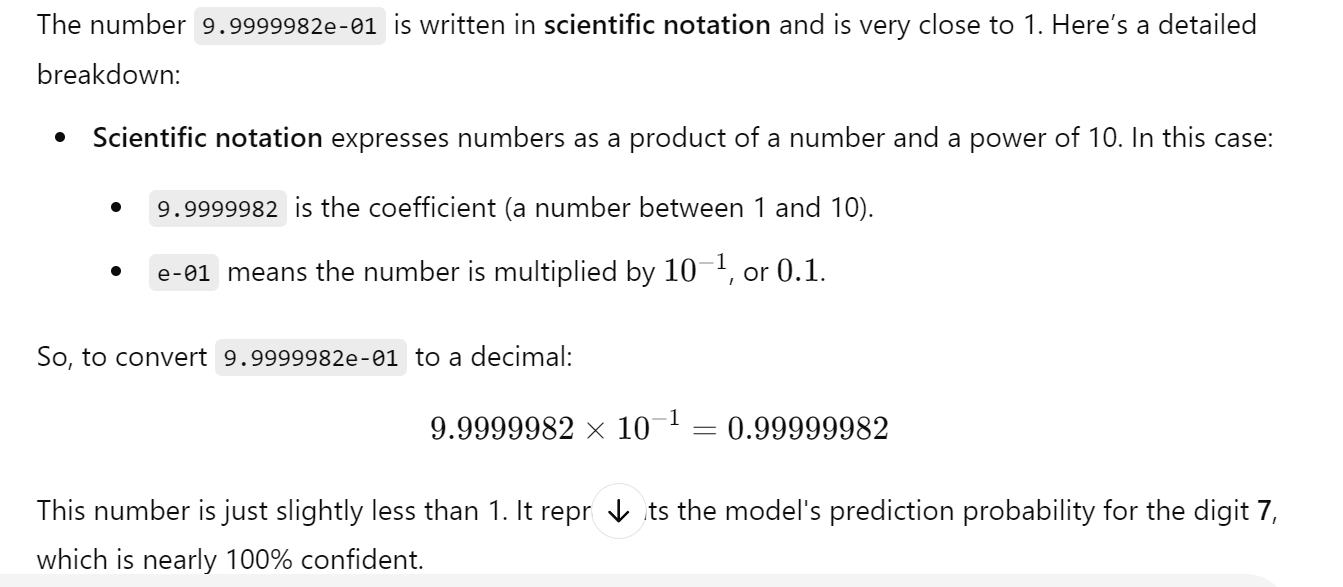


--------------------------------
##Interpreting the values:The 7th element (9.9999982e-01, or ~1)

is by far the largest, which means the model is highly confident that the image corresponds to the class 7.

All other values are extremely small (close to 0), which means the model has almost no confidence that the image corresponds to any of those classes.

Thus, the model is predicting that the image is most likely the digit 7 with near certainty (probability ~1).

------------------------------------
#Summary
The array represents the model's confidence in each class (0-9).

The highest value (in this case, 9.9999982e-01) indicates the predicted class, which here is 7.

All other values are very small, meaning the model is highly confident the image is not one of the other digits.

This number is just slightly less than 1. It represents the model's prediction probability for the digit 7, which is nearly 100% confident.

# 5.2 Locate the max value of the results probability distribution

In [12]:
predictions[0].argmax()

7

# Use argmax() to locate the the maximum value in the result array
In the context of your code, predictions[0].argmax() returns the index of the maximum value in the array predictions[0].

-------------------------
Here’s how it works:

##predictions[0]

is an array of probabilities, each corresponding to the model’s confidence that the first image in test_digits belongs to a particular class (digit 0-9).

argmax() is a function that finds the index of the maximum value in an array.

##predictions:

When you call model.predict(test_digits), the model makes predictions for all 10 images in test_digits.

The result is an array, where each element corresponds to the prediction for one of the images in test_digits.

##predictions[0]:

This refers to the prediction made for the first image (index 0) in test_digits.

predictions is an array of length 10, with one prediction per image.

predictions[0] accesses the prediction for the first image.
What is inside predictions[0]:

predictions[0] is itself an array, containing probabilities for each possible class (in this case, the digits 0 through 9).

This array will have 10 values (because there are 10 possible digit classes).

Each value represents the probability that the model assigns to the image being a particular digit.

##Recap:
predictions: An array of predictions, one for each image.

##predictions[0]:

###The prediction for the first image, which is an array of probabilities (one for each possible digit).

The [0] refers to the first element of the predictions array, i.e., the first image's prediction.

----------
##For example

Given this array from predictions[0]:


    [4.0162621e-12, 1.0832822e-12, 3.7094920e-09, 1.2595258e-08, 4.7081598e-15, 6.7246651e-12, 2.3243598e-15, 9.9999982e-01, 2.3771998e-10, 6.7496210e-08]

The argmax() function will return 7, because 9.9999982e-01 is the largest value, and it is at index 7.

This means the model predicts that the digit in test_digits[0] is 7, as it has the highest confidence for this class.

In [13]:
predictions[0][7]


0.9999998

In [14]:
test_labels[0]

7

# 6. Evaluate the model on new data

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9749 - loss: 0.0903
test_acc: 0.9789000153541565


# 7. Save the history of the fit model per epoch - loss & accuracy

In [16]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9924 - loss: 0.0249 - val_accuracy: 0.9785 - val_loss: 0.0766
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9950 - loss: 0.0181 - val_accuracy: 0.9773 - val_loss: 0.0917
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9954 - loss: 0.0161 - val_accuracy: 0.9812 - val_loss: 0.0835
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9973 - loss: 0.0098 - val_accuracy: 0.9812 - val_loss: 0.0814
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9977 - loss: 0.0089 - val_accuracy: 0.9808 - val_loss: 0.0856
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9983 - loss: 0.0069 - val_accuracy: 0.9805 - val_loss: 0.0901
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9987 - loss: 0.0049 - val_accuracy: 0.9809 - val_loss: 0.0879
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9991 - loss: 0

# 7.1 Access the history of the model

In [17]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

# 7.2 Plot the history of the model

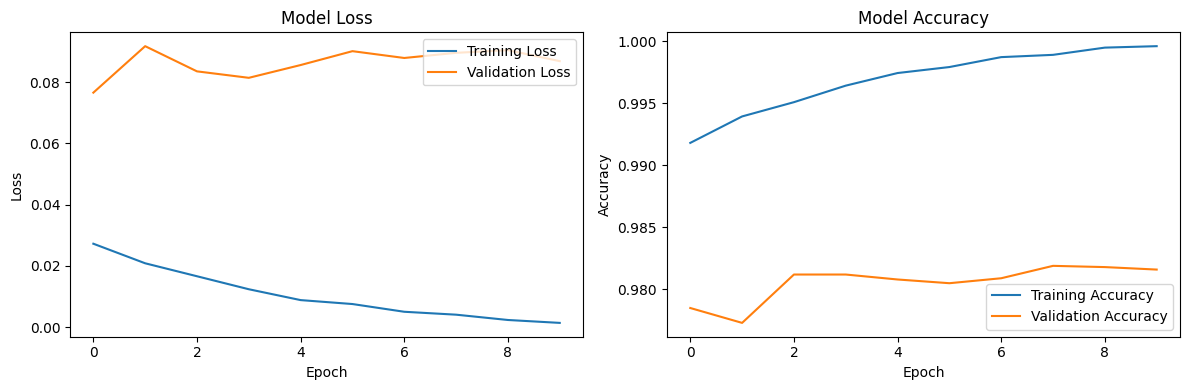

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


# Interpreting the graphs of loss and accuracy over epochs

It provides insight into how well the model is learning and whether it's generalizing to unseen data (validation set).

-----------------------------------------------
Here's how to interpret these graphs:

# 1. Loss Graph (Training & Validation Loss vs. Epochs)
Training Loss: Indicates how well the model is fitting the training data.

Validation Loss: Measures how well the model is performing on unseen data (test set).

-----------------------
#Key Interpretations:
Decreasing Loss: Both training and validation losses should generally decrease as training progresses, indicating that the model is learning.

##Training Loss Much Lower Than Validation Loss:

=================================================
###Overfitting:

If the training loss keeps decreasing but the validation loss stops decreasing (or starts increasing), the model is likely overfitting.

This means the model is memorizing the training data but not generalizing well to new data.

====================================================
##Both Losses Plateau:

If both the training and validation losses flatten out after a certain number of epochs, this suggests that the model has reached its capacity and further training won't improve performance significantly.

=======================================================
##Training and Validation Loss Converging:

This indicates a good fit. The model is performing equally well on both the training and validation datasets, suggesting good generalization.

------------------------------------------
#Example:

=======================================================
##Good Fit:
Both the training and validation losses decrease and converge, indicating that the model is neither overfitting nor underfitting.

##Overfitting:
Training loss keeps decreasing, but validation loss increases after a certain number of epochs. This is a classic sign of overfitting.

-----------------------------------
#2. Accuracy Graph (Training & Validation Accuracy vs. Epochs)
Training Accuracy: Shows how accurate the model is on the training data.

Validation Accuracy: Shows how accurate the model is on the validation/test data.

Key Interpretations:
###Increasing Accuracy:

Both training and validation accuracy should increase over epochs. This suggests that the model is improving at classifying data correctly.

Training Accuracy Much Higher Than Validation Accuracy:

###Overfitting:

If the training accuracy is significantly higher than the validation accuracy, it suggests overfitting. The model performs well on training data but struggles with generalization to unseen data.

###Validation Accuracy Stagnates or Decreases:

If validation accuracy stops improving or starts decreasing while training accuracy continues to increase, it's another sign of overfitting.

###Both Accuracies Increase and Converge:

This indicates that the model is generalizing well, learning to perform well on both the training and unseen validation data.